In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# 2. Load dataset
df = pd.read_csv("bank.csv", sep=';')

# 3. Encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Separate features and target
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

# 5. Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [2]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. Predict on test set
y_pred = model.predict(X_test)


In [3]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.92      0.93      1205
        True       0.42      0.44      0.43       152

    accuracy                           0.87      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.87      0.87      0.87      1357



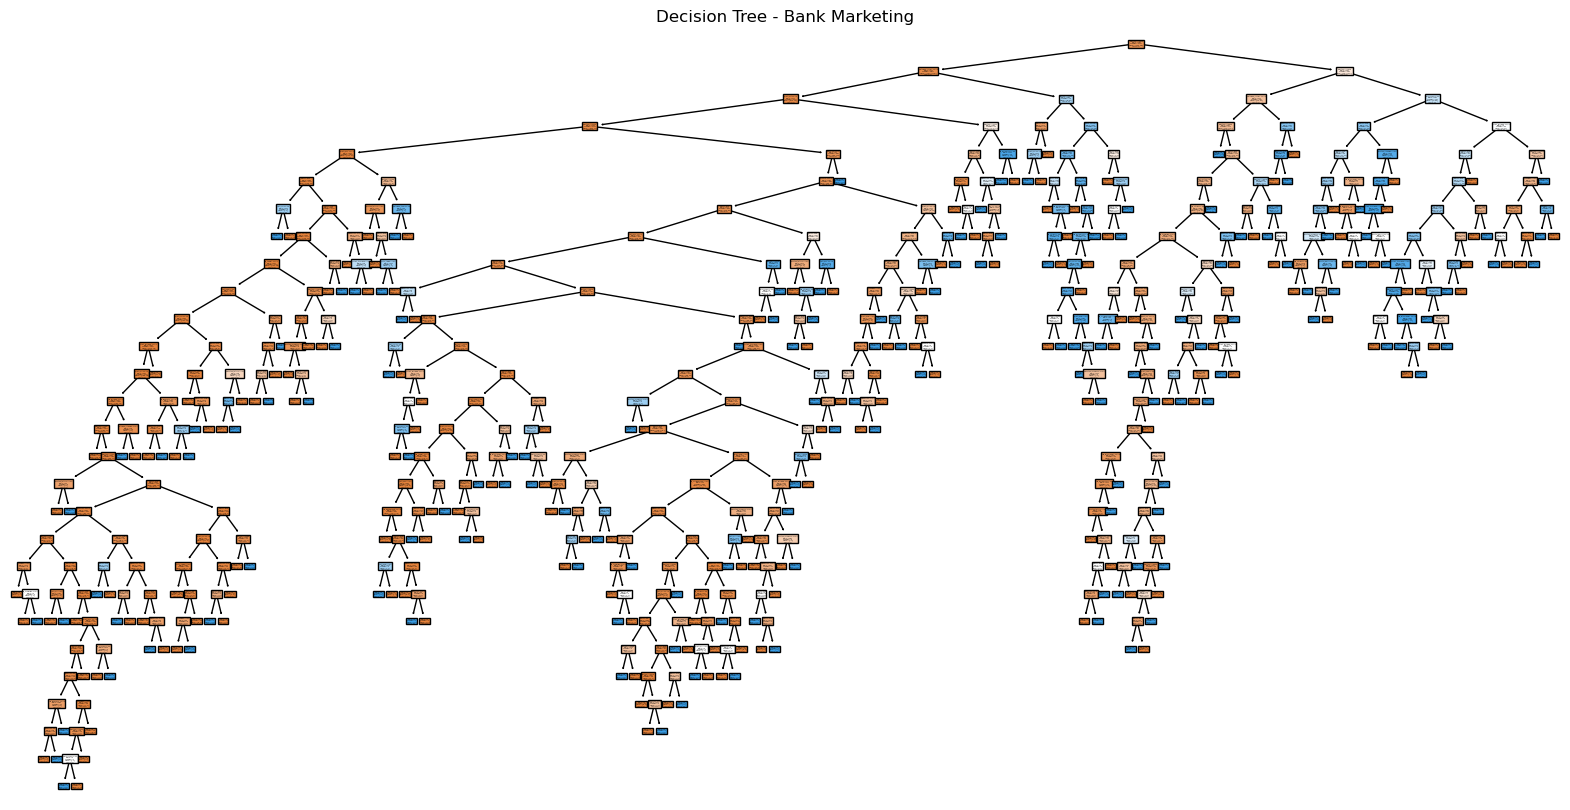

In [5]:
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree - Bank Marketing")
plt.show()